# Gradient Boosting on the mushroom dataset

importing packages and libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X=pd.get_dummies(df.drop('class',axis=1))

In [6]:
y=df['class']

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size=.15, random_state=42)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# defining parameters for the grid search
param_grid= {'n_estimators':[50,100],
            'learning_rate':[0.1,0.05,0.2],
            'max_depth':[3,4,5]}

In [15]:
# gradient boosting model
model= GradientBoostingClassifier()


In [16]:
grid=GridSearchCV(model,param_grid=param_grid)

In [17]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [18]:
from sklearn.metrics import classification_report,plot_confusion_matrix, accuracy_score 

In [19]:
predictions= grid.predict(X_test)
predictions

array(['e', 'p', 'p', ..., 'e', 'e', 'e'], dtype=object)

In [20]:
grid.best_estimator_

GradientBoostingClassifier()

finding the best parameters

In [21]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

the predictions are perfect!

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       637
           p       1.00      1.00      1.00       582

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [23]:
# finding the most important features
grid.best_estimator_.feature_importances_

array([4.80337949e-18, 5.04406696e-04, 1.60452694e-16, 0.00000000e+00,
       0.00000000e+00, 1.01005726e-18, 0.00000000e+00, 1.40409578e-03,
       4.32836497e-16, 1.66203725e-04, 6.22281525e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.56654045e-05, 1.76045916e-18,
       2.83306437e-19, 7.33412042e-24, 9.71152808e-05, 2.38492949e-03,
       3.16255047e-02, 1.92068523e-05, 5.01605384e-02, 0.00000000e+00,
       7.14123530e-03, 6.20780261e-02, 0.00000000e+00, 6.20114377e-01,
       4.62420426e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.57642221e-04, 9.91633798e-06, 1.56409008e-03,
       3.73917785e-04, 0.00000000e+00, 0.00000000e+00, 2.86429117e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.78950265e-18, 3.17918457e-16, 0.00000000e+00, 2.46415445e-19,
       0.00000000e+00, 3.14544823e-04, 3.18714087e-04, 1.05650809e-05,
       5.62427536e-04, 1.09814112e-01, 0.00000000e+00, 1.03618138e-02,
      

In [28]:
imp_features=pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])

In [37]:
imp_features= imp_features[imp_features['Importance']>0.0005]
imp_features=imp_features.sort_values('Importance')

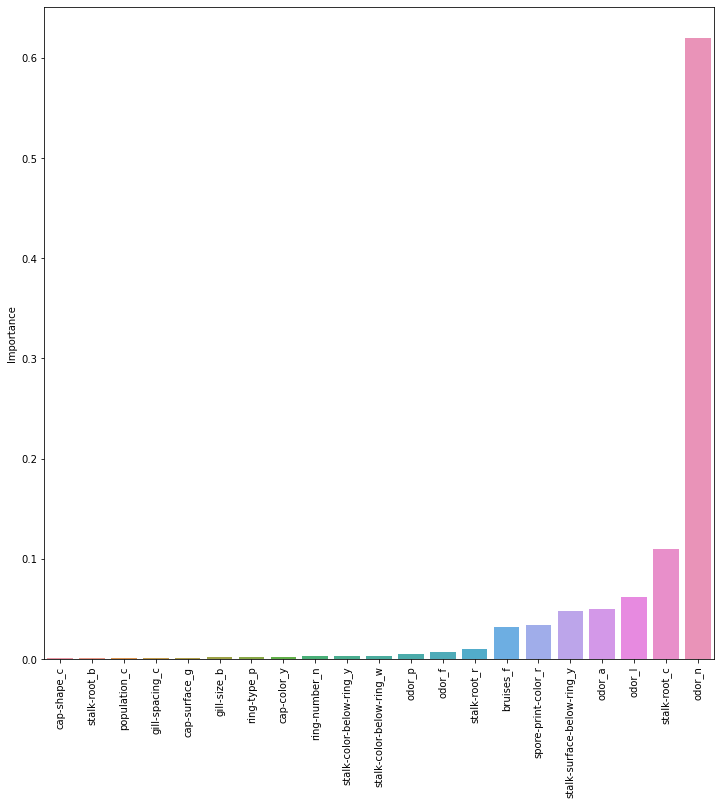

In [38]:
plt.figure(figsize=(12,12))
sns.barplot(x=imp_features.index,y='Importance',data=imp_features)
plt.xticks(rotation=90);


odour_n is the most important feature